<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objectifs" data-toc-modified-id="Objectifs-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objectifs</a></span></li><li><span><a href="#Import" data-toc-modified-id="Import-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import</a></span></li><li><span><a href="#Résumé-vu-jusqu'à-présent" data-toc-modified-id="Résumé-vu-jusqu'à-présent-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Résumé vu jusqu'à présent</a></span><ul class="toc-item"><li><span><a href="#Série-Temporelle" data-toc-modified-id="Série-Temporelle-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Série Temporelle</a></span></li><li><span><a href="#Tous-les-réseaux" data-toc-modified-id="Tous-les-réseaux-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Tous les réseaux</a></span></li></ul></li><li><span><a href="#Importer-les-données" data-toc-modified-id="Importer-les-données-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Importer les données</a></span></li><li><span><a href="#Créer-le-modèle" data-toc-modified-id="Créer-le-modèle-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Créer le modèle</a></span></li><li><span><a href="#Comprendre-les-paramètres-en-jouant-avec" data-toc-modified-id="Comprendre-les-paramètres-en-jouant-avec-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Comprendre les paramètres en jouant avec</a></span><ul class="toc-item"><li><span><a href="#Nombre-de-neurones" data-toc-modified-id="Nombre-de-neurones-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Nombre de neurones</a></span></li></ul></li><li><span><a href="#Learning-Rate" data-toc-modified-id="Learning-Rate-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Learning Rate</a></span></li><li><span><a href="#Comprendre-la-courbe-d'apprentissage-(learning-curve)" data-toc-modified-id="Comprendre-la-courbe-d'apprentissage-(learning-curve)-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Comprendre la courbe d'apprentissage (learning curve)</a></span></li><li><span><a href="#Utiliser-DropOut-et-Batch-Normalization" data-toc-modified-id="Utiliser-DropOut-et-Batch-Normalization-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Utiliser DropOut et Batch Normalization</a></span></li><li><span><a href="#Prédire" data-toc-modified-id="Prédire-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Prédire</a></span></li><li><span><a href="#Erreur" data-toc-modified-id="Erreur-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Erreur</a></span><ul class="toc-item"><li><span><a href="#MSE" data-toc-modified-id="MSE-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>MSE</a></span></li><li><span><a href="#RMSE" data-toc-modified-id="RMSE-11.2"><span class="toc-item-num">11.2&nbsp;&nbsp;</span>RMSE</a></span></li></ul></li><li><span><a href="#Sauver-et-loader-un-modèle" data-toc-modified-id="Sauver-et-loader-un-modèle-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Sauver et loader un modèle</a></span></li><li><span><a href="#Tester-les-paramètres" data-toc-modified-id="Tester-les-paramètres-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Tester les paramètres</a></span></li></ul></div>

## Objectifs

- Créer un model simple de MLP
- Faire une prédiction
- Tester l'erreur
- Sauver le modèle et le loader

## Import

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns; sns.set_theme()
import numpy as np
from scipy import stats
import random
from collections import deque 
import os
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.utils.vis_utils import plot_model
import tensorflow as tf
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow import keras
%matplotlib inline
from joblib import Parallel, delayed
from scipy.stats import f_oneway
# univariate mlp example
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from matplotlib.patches import Patch
plt.rcParams["figure.figsize"] = (20,10)
import warnings
plt.rcParams["figure.autolayout"] = True
warnings.filterwarnings("ignore")

## Résumé vu jusqu'à présent
###  Série Temporelle
- (1) Transformer index en date time
- (2) Plot ==> exploration
- (3) Valeur manquante ==> remplire intélligement 
- (4) On regarde si c'est stationnaire (moyenne de la différence linéaire)
    - ==> Test adfuller (p-value > 0.05 ==> non stationnaire)
    - ==> Rendre stationnaire avec la différence
    
### Tous les réseaux 

- (5) Split ==> dataset = training + (validation) + test set
- (6) Normalisation (scaling)
    - MinMax ou Standard
- (7) Resplit en:
    - train = X_train + Y_train (X_train ==> entrainé le modèl, Y_train ==> output désiré)
    - test = X_test + Y_test (X_test ==> utilisation pour prédire, Y_test ==> vérifié nos output)
    
- (8) Création de modèle
    - Model Sequential ==> mettre en place le réseau en séquence 
    - Dense_1 
        - nombre de neurones (units)
        - function activation ==> ReLu (pas de valeur négative) + tanh (valeur positive et négative)
        - Input dimension ==> nombre de valeur utilisée pour le training 
    - Dense_2
    - Compilation (modifier les paramètres)
        - Optimizer ==> Adam ou SGD ==> algorithme qui optimize la diminution du learning rate en fonction des connections
         - Learning rate ==> Force à laquelle on va mettre à jour les connections (plus il est gros, plus il va faire de grand bond (grosse update)
         - Loss/Cost ==> Erreur sur la totalité du training set ('MSE', 'RMSE' ou créer sa propre)
             - Objectif de réduire la loss ==> mise à jour des connections 
     - Fit (on nourrit (feed) le réseau)
         - X_train, Y_train
         - epochs ==> Nombre de fois ou on parcours le set en entier
         - verbose ==> voir la progression (2 useless)
         - batch_size ==> nombre d'exemple avant de faire un update des connections
             - size = 1 ==> on update à chaque data
             - size = len(X_train) ==> on update après la totalité du dataset
             - size entre 1 et len(X_train) ==> 16, 32, 64, 128
         - validation_data ==> Calculer l'erreur (loss) sur le test set (ou validation set)
             - X_test + Y_test
             
- (9) On récupère l'history + Plot
    - Regarde la valeur loss + val_loss ==> val_loss ==> loss du test set
    - Au début des learning curves:
        - loss + val_loss ==> diminue ==> réseau apprends 
    - Fin des learning curves
        - val_loss ne doit pas remonter 
            - Il a trop appris ==> over fitting
    - On arrête le learning ==> quand la val_loss est au minimum
    - Problème learning curve
        - Local minima ==> minimum qui n'est pas le minimum (vrai) des minimum 
            - Coincé dans un local minimum ==> Augmente LR
        - val_loss remonte ==> overfitting 
        - Noisy val_loss et loss ==> LR trop grand ==> il fait des grands pas ==> update trop conséquent de connections ==> impossible de trouver un mimima ==> baisse le LR
        
- (10) Problème Overfitting ==> pas prédire le test set ==> il est trop entrainé le training set
    - DropOut ==> désactive des neurones à chaque épochs aléatoirement 
        - Fréquence des neurones ==> 0.2 ==> 20% des neurones désactivés
    - BatchNormalization ==> Normaliser l'update des connetions en fonction de la taille du batch pour éviter qu'un batch update plus qu'un autre. Lisser l'update des connections 
    
- (11) Underfitting ==> il arrive pas à prédire le test set 
    - Cause ==> Pas assez entrainé ==> augmenter les épochs ou LR
    - Cause ==> Pas assez de data ==> le modèle ne peut pas généraliser une prédiction 
        - Revoir le data cleaning 
        - Rajouter des données 
            - Rajouter moyennes, min, max, rolling, std
        - Rajouter des subsets données 
            - On regarde l'erreur de nos prédictions ==> rajouter des données ou on fait beaucoup d'erreur 
                - Exemple: on fait 30% d'erreur en hiver et 10% en été ==> rajouter des données relative à l'hiver
                - Poids sur nos data, l'hiver compte plus que l'été ==> update des connections pour l'hiver. On définit ça en fonction de l'erreur qu'on a ou alors si on a moins de data en hiver. 

## Importer les données

In [166]:
X_train = pd.read_csv('/Users/mc/Documents/Cours/X_train_temperature_FR.txt', sep =' ', header=None)
Y_train = pd.read_csv('/Users/mc/Documents/Cours/Y_train_temperature_FR.txt', header=None)
print(X_train.shape)
print(Y_train.shape)

(2206, 10)
(2206, 1)


In [167]:
X_test = pd.read_csv('/Users/mc/Documents/Cours/X_test_temperature_FR.txt', sep =' ', header=None)
Y_test = pd.read_csv('/Users/mc/Documents/Cours/Y_test_temperature_FR.txt', header=None)
print(X_test.shape)
print(Y_test.shape)

(940, 10)
(940, 1)


## Créer le modèle

Keras est relativement simple d'utilisation, il faut commencer par:
- Sequential() afin dé débuter une séquence de couche
- Puis une seconde couche qui peut avoir plusieurs type. Ici nous prendrons une couche **Dense** qui correspond a une couche simple et totalement connecté aux couches suivantes. Dans cette première couche Dense il faut indiquer:
    - Le nombre de neurons que l'on veut dans cette couche
    - la fonction d'activation qui correspond à la fonction qui transformera les **inputs x weights**
    - input_dim correspond à la dimension de nos inputs. Nous avions décidé de prendre les 10 inputs précédents pour prédire l'input n+1. input_dim est donc égale à 10 et ne peut être changé que lorsque l'on change notre façon de préparer nos inputs (voir 01_preparation_de_donnees)
   
    
- il faut ensuite créer une deuxieme/dernière couche Dense qui représente la couche des outputs, ici on lui indique uniquement 1 neurons car l'on veut prédire une valeur unique

- Enfin il faut compiler le modèle en lui indiquant:
    - Un optimizer qui est un algorithme/équation en lui même et qui va modifier le poids des connections et/ou du learning rate. Il est aussi possible de rentrer sa propre fonction. On la définit la ligne au dessus en lui indiquant le **learning rate**, c'est à dire à quel point les connections seront updatés à chaque epoch
    - loss c'est la fonction qui permet de calculer l'erreur durant le training, il y a différentes fonctions comme mse, rmse. Il est aussi possible de rentrer sa propre fonction.
    
    
- A la fin on **fit** le modèle pour utiliser nos données et on lui donne donc comme argument:
    - X_train (nos valeurs pour prédire)
    - Y_train (la valeurs à prédire)
    - epochs (le nombre de fois que le modèle verra chaque exemple de notre training set)
    - verbose, s'il est égale à 0 on ne verra pas ce qu'il se passe, à 1 on aura la totalité des informations durant le training (errreur par epoch, temps par step) et enfin à deux on aura une information partielle de l'évolution

In [168]:
i1 = 3
i2 = 2
w1 = 0.4
w2 = 0.3 

sum_aw = i1*w1 + i2*w2

neuron1 = np.exp(sum_aw)
neuron1

6.049647464412947

In [77]:
n_steps = 10

tf.keras.backend.clear_session()

# define model
model = Sequential()
model.add(Dense(1000, activation='relu', input_dim=n_steps))
model.add(Dense(1))
model.summary()

opt = SGD(lr=0.01)
model.compile(optimizer=opt, loss='mae')

# fit model
history = model.fit(X_train, Y_train, epochs=100, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              11000     
                                                                 
 dense_1 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 12,001
Trainable params: 12,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
47/69 [===================>..........] - ETA: 0s - loss: 0.4217

2022-04-26 15:57:30.755645: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


69/69 [==============================] - 0s 4ms/step - loss: 0.3594
Epoch 2/100
69/69 [==============================] - 0s 3ms/step - loss: 0.2224
Epoch 3/100
69/69 [==============================] - 0s 3ms/step - loss: 0.2186
Epoch 4/100
69/69 [==============================] - 0s 4ms/step - loss: 0.2167
Epoch 5/100
69/69 [==============================] - 0s 4ms/step - loss: 0.2152
Epoch 6/100
69/69 [==============================] - 0s 3ms/step - loss: 0.2137
Epoch 7/100
69/69 [==============================] - 0s 4ms/step - loss: 0.2130
Epoch 8/100
69/69 [==============================] - 0s 3ms/step - loss: 0.2120
Epoch 9/100
69/69 [==============================] - 0s 4ms/step - loss: 0.2110
Epoch 10/100
69/69 [==============================] - 0s 4ms/step - loss: 0.2106
Epoch 11/100
69/69 [==============================] - 0s 4ms/step - loss: 0.2097
Epoch 12/100
69/69 [==============================] - 0s 4ms/step - loss: 0.2089
Epoch 13/100
69/69 [=============================

<AxesSubplot:>

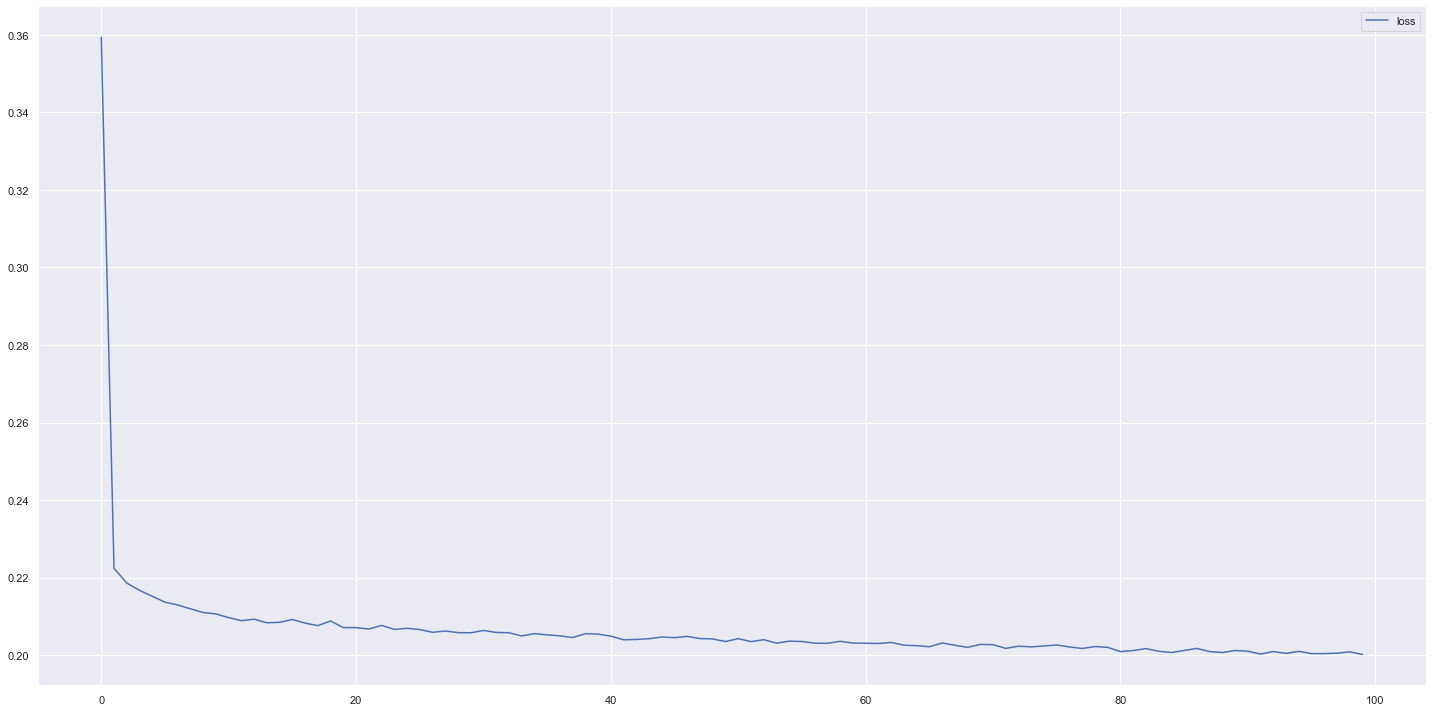

In [78]:
pd.DataFrame(history.history)

## Comprendre les paramètres en jouant avec
### Nombre de neurones
- (1) Faire un plot de la loss fonction en fonction des epochs
    - Tips: history.history
    
- (2) Changer la taille de la première couche avec 10, 100 puis 1000 neurones et ploter le résultats sur un même graphe

- Utiliser la fonction model (envoyé)
- Changer la variable dense_1 par 10, 100 et 1000
- Faire le plot de history.history de ces 3 variables

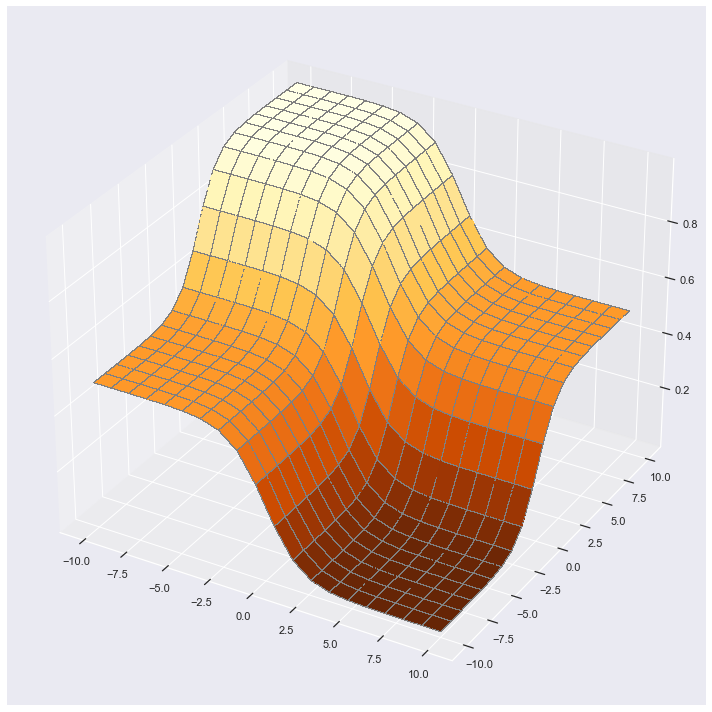

In [88]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

def sigmoid(x):
    output = 1.0 / (1.0 + np.exp(-x))
    return output

def sigmoid_output_to_derivative(output):
    return output*(1-output)

X = np.array([
    [0,1],
    [0,1],
    [1,0],
    [1,0]
])
y = np.array([[0, 0, 1, 1]]).T

synapse_0 = np.empty((2,1))

# the error aggregation starts here
x_range = np.linspace(-10, 10, 20, dtype=np.float)
y_range = np.linspace(-10, 10, 20, dtype=np.float)
errors = []
for _x in x_range:
    synapse_0[0] = _x
    for _y in y_range:
        synapse_0[1] = _y

        # apply the model to the input
        layer_0 = X
        layer_1 = sigmoid(np.dot(layer_0, synapse_0))

        # evaluate the error using the RMSE
        error = np.mean(np.sqrt((layer_1 - y) ** 2))
        errors.append(error)

# in order to plot we need to transform x,y and z in 2D array 
error_surface = np.reshape(np.array(errors), (x_range.shape[0], y_range.shape[0]))
_X, _Y = np.meshgrid(x_range, y_range, indexing='ij')

# plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(_X, _Y, error_surface, cmap=cm.YlOrBr_r, edgecolor='gray', linewidth=0.004, antialiased=False)
plt.show()

2022-04-26 16:16:37.611291: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-26 16:16:39.694049: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-26 16:16:41.750648: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


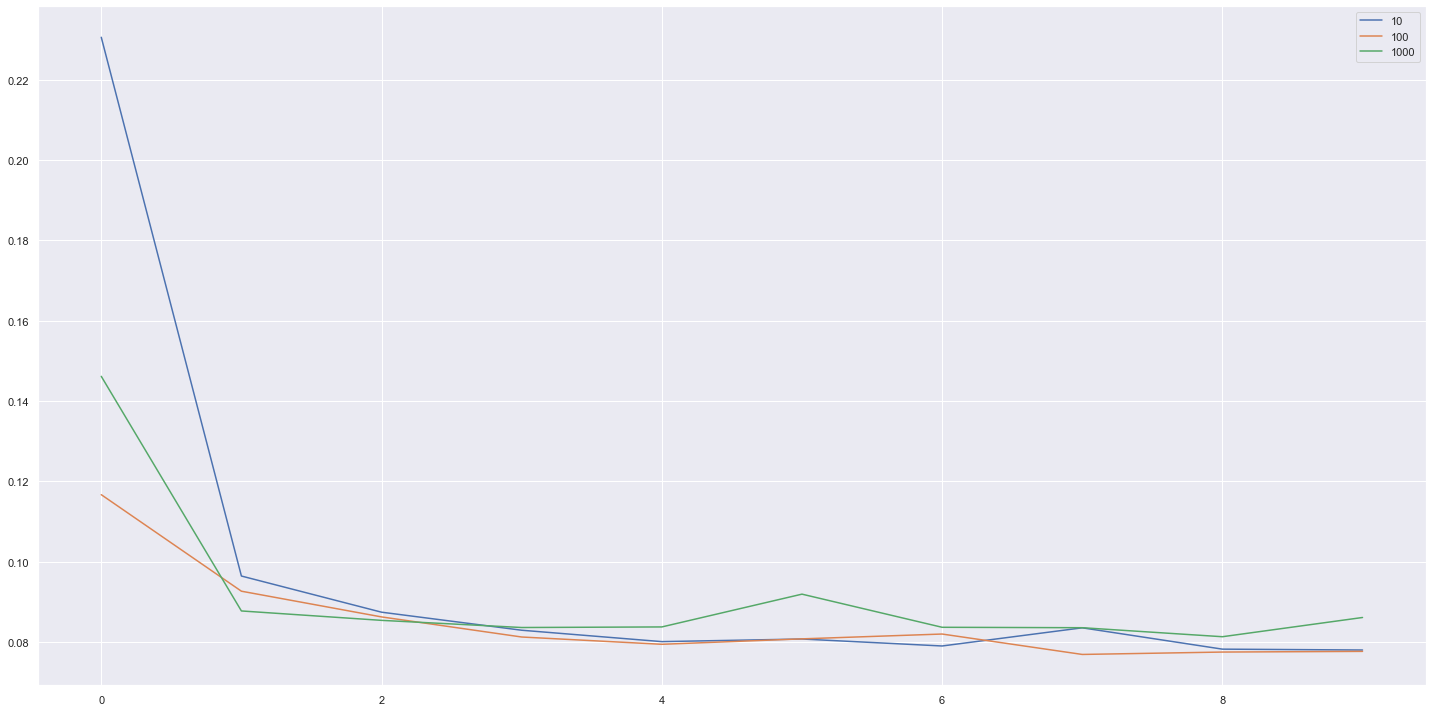

In [100]:
modelS = []
for i in [10, 100, 1000]:
    modelS.append(model(i, X_train, Y_train).history)

for i in range (0, len(modelS)):
    plt.plot(pd.DataFrame(modelS[i]),label=[10, 100, 1000][i])
plt.legend()

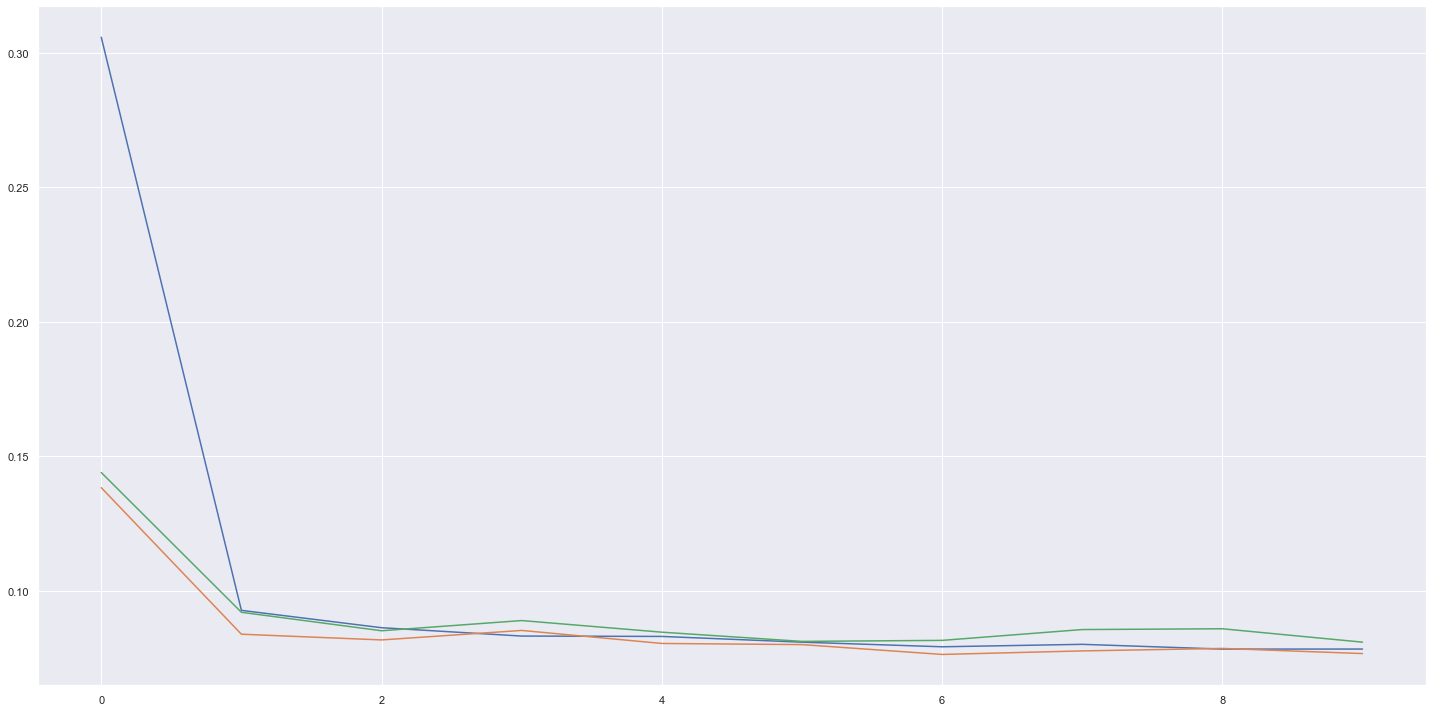

In [99]:
for i in range (0, len(modelS)):
    plt.plot(pd.DataFrame(modelS[i]))

2022-04-26 16:01:33.150643: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-26 16:01:35.413055: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-26 16:01:37.514012: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


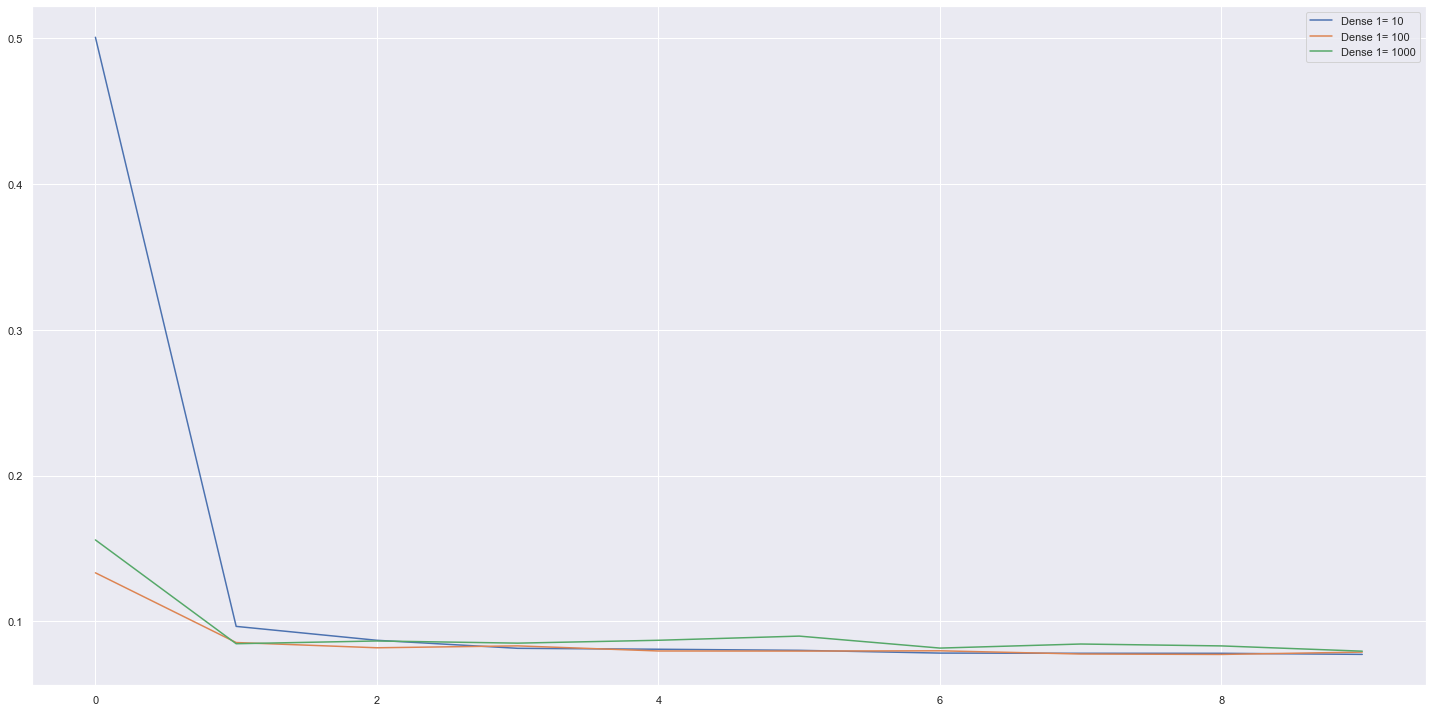

In [79]:
def model(dense_1, X_train, Y_train):
    n_steps = 10

    tf.keras.backend.clear_session()

    # define model
    model = Sequential()
    model.add(Dense(dense_1, activation='relu', input_dim=n_steps))
    model.add(Dense(1))
    opt = Adam(lr=0.01)
    model.compile(optimizer=opt, loss='mse')

    # fit model
    history = model.fit(X_train, Y_train, epochs=10, verbose=0)
    return history

history_dense1_10 = model(10, X_train, Y_train)
history_dense1_100 = model(100, X_train, Y_train)
history_dense1_1000 = model(1000, X_train, Y_train)

plt.plot(pd.DataFrame(history_dense1_10.history), label = 'Dense 1= 10')
plt.plot(pd.DataFrame(history_dense1_100.history), label = 'Dense 1= 100')
plt.plot(pd.DataFrame(history_dense1_1000.history), label = 'Dense 1= 1000')
plt.legend()
plt.show()

## Learning Rate
- (1) Faire un plot de la loss fonction en fonction des epochs
    - Tips: history.history
    
- (2) Changer la taille du learning rate en 0.001, 0.01 et 0.5 et ploter le résultats sur un même graphe

Epoch 1/10
30/69 [============>.................] - ETA: 0s - loss: 0.3193

2022-04-26 16:39:07.811232: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


69/69 [==============================] - 0s 4ms/step - loss: 0.2044
Epoch 2/10
69/69 [==============================] - 0s 4ms/step - loss: 0.1044
Epoch 3/10
69/69 [==============================] - 0s 4ms/step - loss: 0.0959
Epoch 4/10
69/69 [==============================] - 0s 4ms/step - loss: 0.0975
Epoch 5/10
69/69 [==============================] - 0s 3ms/step - loss: 0.0937
Epoch 6/10
69/69 [==============================] - 0s 4ms/step - loss: 0.0944
Epoch 7/10
69/69 [==============================] - 0s 4ms/step - loss: 0.1091
Epoch 8/10
69/69 [==============================] - 0s 3ms/step - loss: 0.0990
Epoch 9/10
69/69 [==============================] - 0s 3ms/step - loss: 0.0952
Epoch 10/10
69/69 [==============================] - 0s 4ms/step - loss: 0.0935


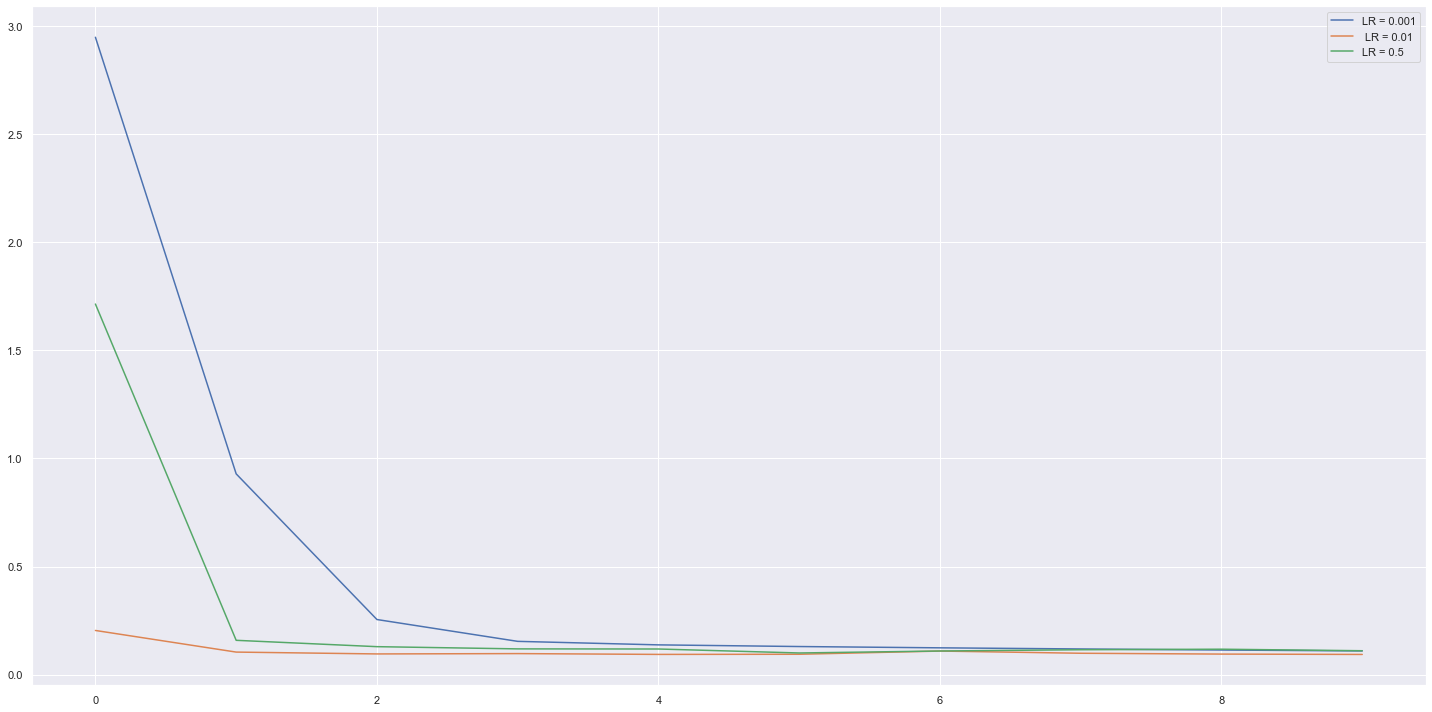

In [107]:
def model(lr, X_train, Y_train):
    n_steps = 10

    tf.keras.backend.clear_session()

    # define model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_dim=n_steps))
    model.add(Dense(1))
    opt = Adam(lr=lr)
    model.compile(optimizer=opt, loss='mse')


    # fit model
    history = model.fit(X_train, Y_train, epochs=10, verbose=1)
    return history



#history_lr_0001 = model(0.001, X_train, Y_train)
history_lr_001 = model(0.1, X_train, Y_train)
#history_lr_05 = model(0.5, X_train, Y_train)

plt.plot(pd.DataFrame(history_lr_0001.history), label = 'LR = 0.001')
plt.plot(pd.DataFrame(history_lr_001.history), label = ' LR = 0.01')
plt.plot(pd.DataFrame(history_lr_05.history), label = 'LR = 0.5')
plt.legend()
plt.show()

## Comprendre la courbe d'apprentissage (learning curve)

On peut également utiliser notre testing set pour voir comment notre algorithme s'améliore sur des données qu'il n'a pas vu et pour lesquels il n'est pas entrainé. Pour se faire on rajoute simplement:
   - validation_data=(X_test, Y_test) dans le model.fit
   
   
- (1) Faire un plot de la loss et val_loss fonction en utilisant différent learning rate
- (2) Faire un plot de val_loss fonction en utilisant différent epoch dont un avec 1000 epoch (et aller prendre un café en attendant)


- **Overfitting** ==> Trop

Epoch 1/30
34/69 [=============>................] - ETA: 0s - loss: 1.8239

2022-04-26 16:51:00.052391: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


69/69 [==============================] - 0s 5ms/step - loss: 1.4046 - val_loss: 0.7493
Epoch 2/30
33/69 [=============>................] - ETA: 0s - loss: 0.5784

2022-04-26 16:51:00.354936: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


69/69 [==============================] - 0s 4ms/step - loss: 0.4507 - val_loss: 0.2777
Epoch 3/30
69/69 [==============================] - 0s 4ms/step - loss: 0.2226 - val_loss: 0.1742
Epoch 4/30
69/69 [==============================] - 0s 4ms/step - loss: 0.1636 - val_loss: 0.1413
Epoch 5/30
69/69 [==============================] - 0s 5ms/step - loss: 0.1346 - val_loss: 0.1219
Epoch 6/30
69/69 [==============================] - 0s 5ms/step - loss: 0.1216 - val_loss: 0.1176
Epoch 7/30
69/69 [==============================] - 0s 5ms/step - loss: 0.1161 - val_loss: 0.1128
Epoch 8/30
69/69 [==============================] - 0s 4ms/step - loss: 0.1130 - val_loss: 0.1136
Epoch 9/30
69/69 [==============================] - 0s 4ms/step - loss: 0.1101 - val_loss: 0.1124
Epoch 10/30
69/69 [==============================] - 0s 4ms/step - loss: 0.1075 - val_loss: 0.1086
Epoch 11/30
69/69 [==============================] - 0s 4ms/step - loss: 0.1052 - val_loss: 0.1114
Epoch 12/30
69/69 [==========

2022-04-26 16:51:09.119298: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


69/69 [==============================] - 0s 5ms/step - loss: 0.1801 - val_loss: 0.1418
Epoch 2/30
36/69 [==============>...............] - ETA: 0s - loss: 0.0920

2022-04-26 16:51:09.414440: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


69/69 [==============================] - 0s 4ms/step - loss: 0.0926 - val_loss: 0.1055
Epoch 3/30
69/69 [==============================] - 0s 4ms/step - loss: 0.0840 - val_loss: 0.0940
Epoch 4/30
69/69 [==============================] - 0s 4ms/step - loss: 0.0833 - val_loss: 0.0916
Epoch 5/30
69/69 [==============================] - 0s 4ms/step - loss: 0.0822 - val_loss: 0.1044
Epoch 6/30
69/69 [==============================] - 0s 4ms/step - loss: 0.0811 - val_loss: 0.1047
Epoch 7/30
69/69 [==============================] - 0s 4ms/step - loss: 0.0770 - val_loss: 0.0997
Epoch 8/30
69/69 [==============================] - 0s 4ms/step - loss: 0.0770 - val_loss: 0.0981
Epoch 9/30
69/69 [==============================] - 0s 4ms/step - loss: 0.0774 - val_loss: 0.1066
Epoch 10/30
69/69 [==============================] - 0s 4ms/step - loss: 0.0785 - val_loss: 0.0928
Epoch 11/30
69/69 [==============================] - 0s 4ms/step - loss: 0.0797 - val_loss: 0.0928
Epoch 12/30
69/69 [==========

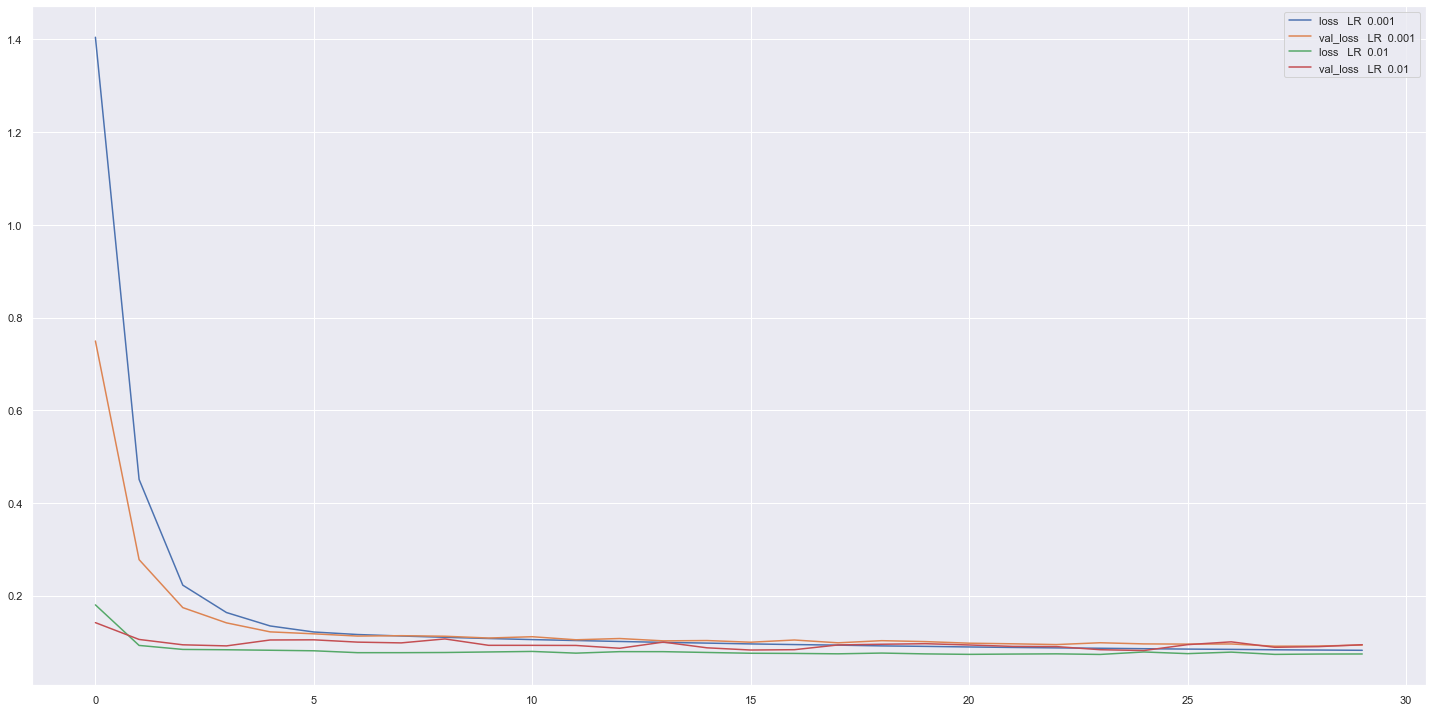

In [117]:
def model(lr, X_train, Y_train, X_test, Y_test):
    n_steps = 10

    tf.keras.backend.clear_session()

    # define model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_dim=n_steps))
    model.add(Dense(1))
    opt = Adam(lr=lr)
    model.compile(optimizer=opt, loss='mse')


    # fit model
    history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                    epochs=30, verbose=1)
    return history



lr = 0.001
history = model(lr, X_train, Y_train, X_test, Y_test)
plt.plot(pd.DataFrame(history.history['loss']), label = 'loss'+'   LR  '+str(lr))
plt.plot(pd.DataFrame(history.history['val_loss']), label = 'val_loss'+'   LR  '+str(lr))

lr = 0.01
history = model(lr, X_train, Y_train, X_test, Y_test)
plt.plot(pd.DataFrame(history.history['loss']), label = 'loss'+'   LR  '+str(lr))
plt.plot(pd.DataFrame(history.history['val_loss']), label = 'val_loss'+'   LR  '+str(lr))
plt.legend()

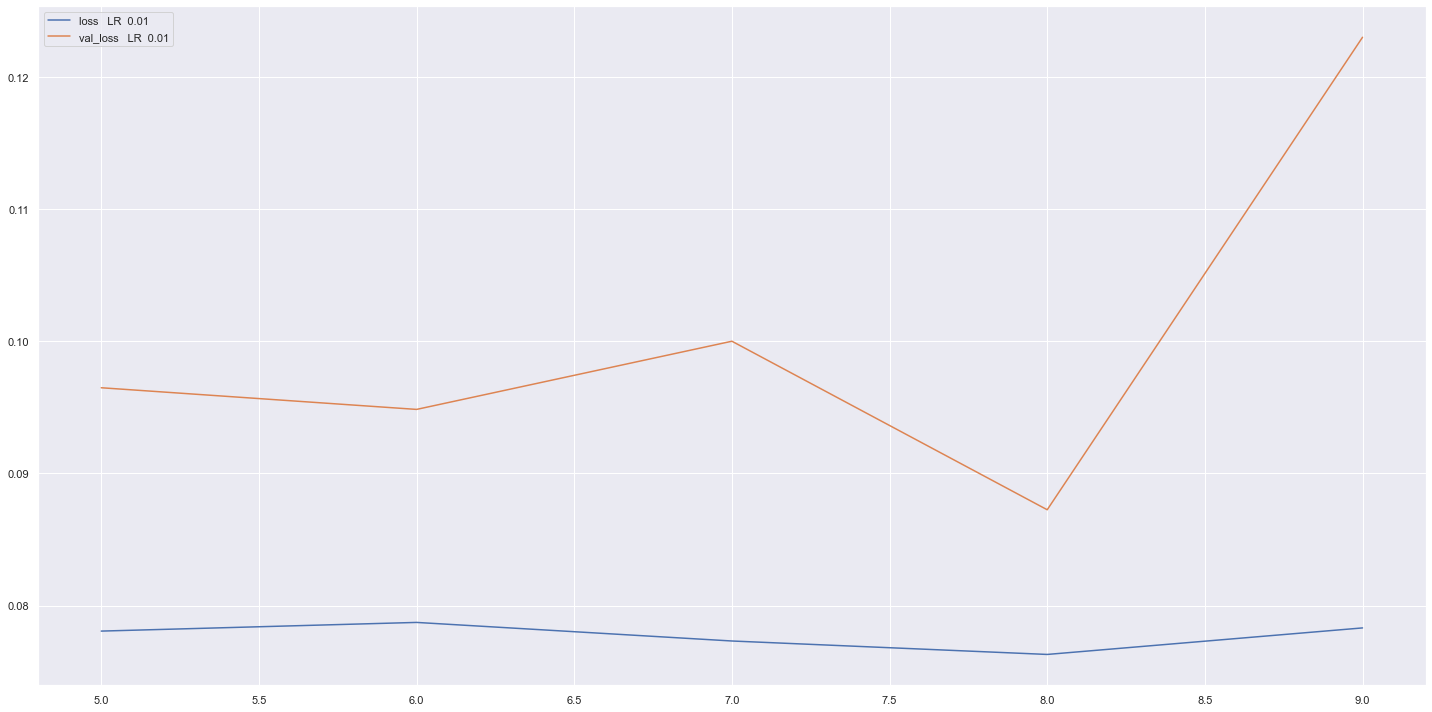

In [115]:

plt.plot(pd.DataFrame(history.history['loss'])[-5:], label = 'loss'+'   LR  '+str(lr))
plt.plot(pd.DataFrame(history.history['val_loss'])[-5:], label = 'val_loss'+'   LR  '+str(lr))
plt.legend()

2022-04-27 10:19:15.985495: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-27 10:19:16.372286: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-27 10:19:18.806507: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-27 10:19:19.091038: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


KeyboardInterrupt: 

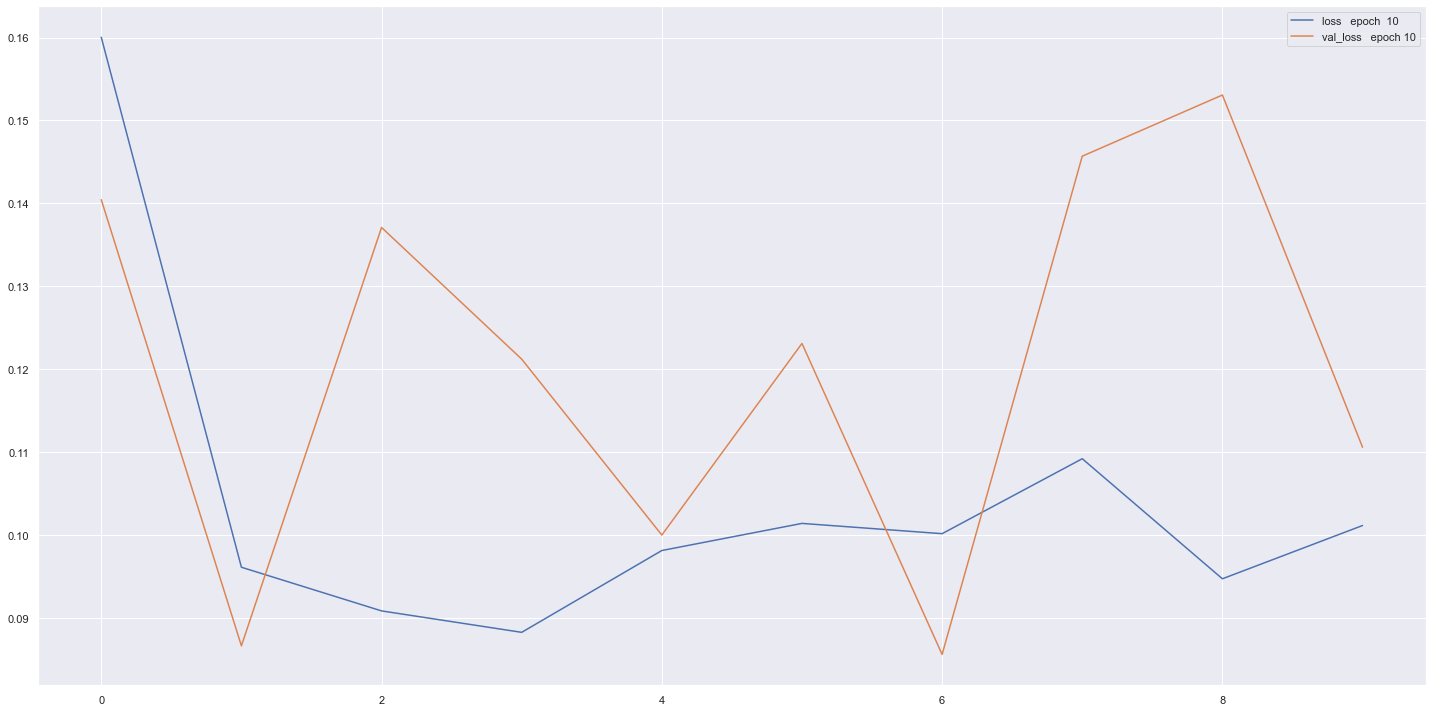

In [169]:
def model_train(epoch, X_train, Y_train, X_test, Y_test):
    n_steps = 10

    tf.keras.backend.clear_session()

    # define model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_dim=n_steps))
    model.add(Dense(1))
    opt = Adam(lr=0.1)
    model.compile(optimizer=opt, loss='mse')

    # fit model
    history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                    epochs=epoch, verbose=0)
    return history

epoch = 10
history_1 = model_train(epoch, X_train, Y_train, X_test, Y_test)
plt.plot(pd.DataFrame(history_1.history['loss']), label = 'loss'+'   epoch  '+str(epoch))
plt.plot(pd.DataFrame(history_1.history['val_loss']), label = 'val_loss'+'   epoch '+str(epoch))
plt.legend()

epoch = 200
history = model_train(epoch, X_train, Y_train, X_test, Y_test)
plt.plot(pd.DataFrame(history.history['loss']), label = 'loss'+'   epoch  '+str(epoch))
plt.plot(pd.DataFrame(history.history['val_loss']), label = 'val_loss'+'   epoch '+str(epoch))
plt.legend()

In [ ]:
pd.DataFrame(history.history['val_loss']).rolling(window=10).mean().dropna().plot()

In [ ]:
plt.plot(pd.DataFrame(history.history['loss']), label = '200')
plt.plot(pd.DataFrame(history.history['loss']).rolling(window=10).mean().dropna(), label = 'Moyenne lissée')
plt.legend()

In [ ]:
plt.plot(pd.DataFrame(history.history['val_loss']), label = '200')
plt.plot(pd.DataFrame(history.history['val_loss']).rolling(window=10).mean().dropna(), label = 'Moyenne lissée')
plt.legend()

## Utiliser DropOut et Batch Normalization

In [141]:

n_steps = 10

tf.keras.backend.clear_session()

# define model
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=n_steps))
model.add(Dense(1))
opt = Adam(lr=0.01)
model.compile(optimizer=opt, loss='mse')


# fit model
history_normal = model.fit(X_train, Y_train, epochs=10, verbose=0)

n_steps = 10

tf.keras.backend.clear_session()

# define model
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=n_steps))
model.add(Dropout(0.2))
model.add(Dense(1))
opt = Adam(lr=0.01)
model.compile(optimizer=opt, loss='mse')

# fit model
history_dropout = model.fit(X_train, Y_train, epochs=10, verbose=0)


tf.keras.backend.clear_session()

# define model
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=n_steps))
model.add(BatchNormalization())
model.add(Dense(1))
opt = Adam(lr=0.01)
model.compile(optimizer=opt, loss='mse')

# fit model
history_batch = model.fit(X_train, Y_train, batch_size = 2, epochs=10, verbose=0)



2022-04-26 17:09:25.221573: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-26 17:09:27.463211: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-26 17:09:29.783947: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [159]:
# define model
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=n_steps))
model.add(BatchNormalization())
model.add(Dense(1))
opt = Adam(lr=0.01)
model.compile(optimizer=opt, loss='mse')

# fit model
history_batch = model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
10/69 [===>..........................] - ETA: 0s - loss: 0.5679 

2022-04-26 17:22:58.982896: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


69/69 [==============================] - 1s 5ms/step - loss: 0.2212
Epoch 2/10
69/69 [==============================] - 0s 5ms/step - loss: 0.1298
Epoch 3/10
69/69 [==============================] - 0s 5ms/step - loss: 0.1328
Epoch 4/10
69/69 [==============================] - 0s 5ms/step - loss: 0.1147
Epoch 5/10
69/69 [==============================] - 0s 5ms/step - loss: 0.1102
Epoch 6/10
69/69 [==============================] - 0s 5ms/step - loss: 0.1138
Epoch 7/10
69/69 [==============================] - 0s 4ms/step - loss: 0.1097
Epoch 8/10
69/69 [==============================] - 0s 5ms/step - loss: 0.1054
Epoch 9/10
69/69 [==============================] - 0s 4ms/step - loss: 0.1135
Epoch 10/10
69/69 [==============================] - 0s 4ms/step - loss: 0.1148


<AxesSubplot:>

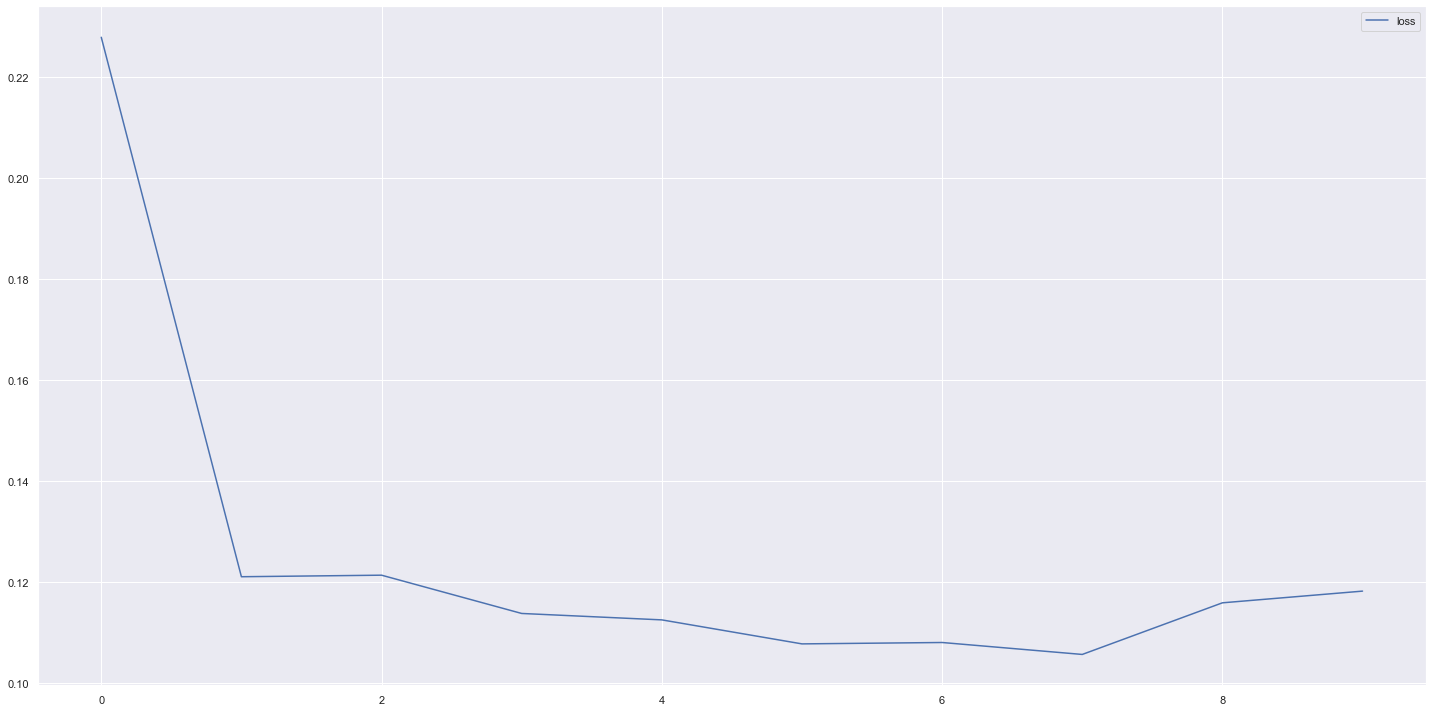

In [157]:
pd.DataFrame(history_batch.history).plot()

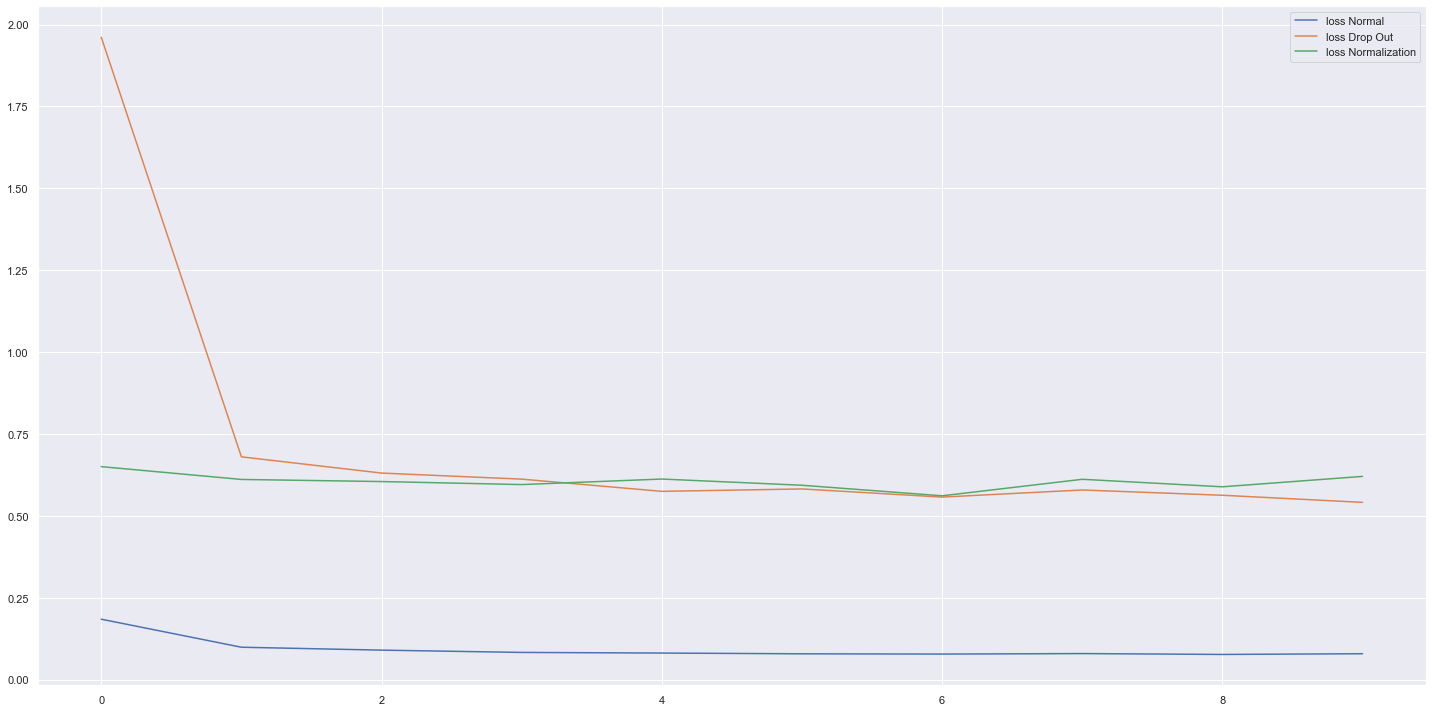

In [142]:
plt.plot(pd.DataFrame(history_normal.history['loss']), label = 'loss'+' Normal  ')
plt.plot(pd.DataFrame(history_dropout.history['loss']), label = 'loss'+' Drop Out')
plt.plot(pd.DataFrame(history_batch.history['loss']), label = 'loss'+' Normalization')
plt.legend()

## Prédire

Pour prédire avec Keras c'est relativement simple, il faut simplement utiliser la fonction **predict** sur les valeurs que l'on veut. Il faut savoir qu'il est indispensable d'avoir scaled ces valeurs de la même façon qu'ont été celle du training. 

- (1) Utiliser la fonction predict sur le X_test
- (2) Faire un plot des valeurs prédites et de Y_test sur le même graphe
- (3) rescale en utilisant:
    - load(open('scaler_fr.pkl', 'rb')) puis
    - .inverse_transform

In [198]:
n_steps = 10

tf.keras.backend.clear_session()

# define model
model = Sequential()
model.add(Dense(10, activation='tanh', input_dim=n_steps))
model.add(Dense(1))

opt = Adam(lr=0.01)
model.compile(optimizer=opt, loss='mse')

# fit model
history = model.fit(X_train, Y_train, epochs=10, verbose=1)

Y_test_predicted = model.predict(X_test, verbose=1)


Epoch 1/10
11/69 [===>..........................] - ETA: 0s - loss: 0.4315 

2022-04-27 11:01:38.034274: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


69/69 [==============================] - 1s 5ms/step - loss: 0.1659
Epoch 2/10
69/69 [==============================] - 0s 4ms/step - loss: 0.0817
Epoch 3/10
69/69 [==============================] - 0s 4ms/step - loss: 0.0776
Epoch 4/10
69/69 [==============================] - 0s 6ms/step - loss: 0.0762
Epoch 5/10
69/69 [==============================] - 0s 4ms/step - loss: 0.0736
Epoch 6/10
69/69 [==============================] - 0s 3ms/step - loss: 0.0741
Epoch 7/10
69/69 [==============================] - 0s 3ms/step - loss: 0.0730
Epoch 8/10
69/69 [==============================] - 0s 4ms/step - loss: 0.0759
Epoch 9/10
69/69 [==============================] - 0s 4ms/step - loss: 0.0721
Epoch 10/10
30/30 [==============================] - 0s 2ms/step


2022-04-27 11:01:41.032007: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [179]:
len(Y_test)

940

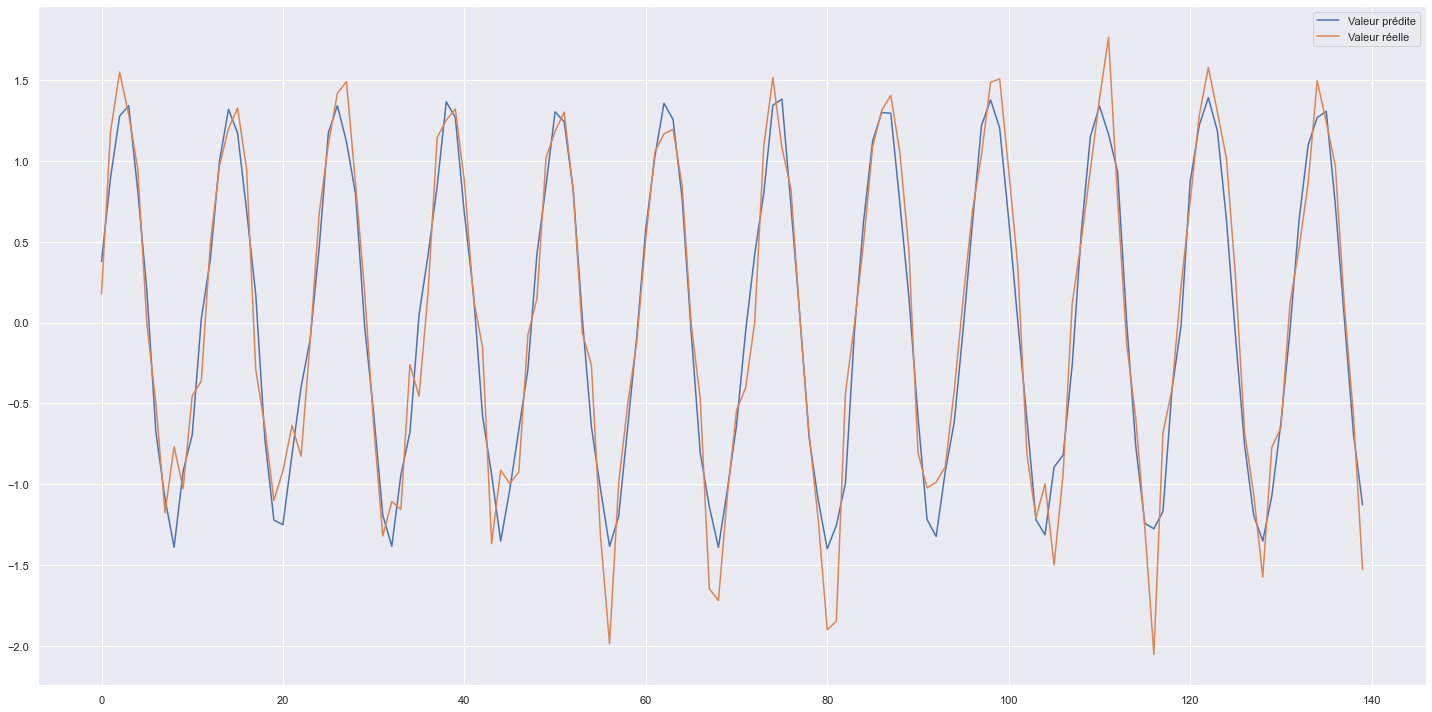

In [184]:
size = len(Y_test)-800
plt.plot(pd.DataFrame(Y_test_predicted).iloc[:size], label = 'Valeur prédite')
plt.plot(pd.DataFrame(Y_test).iloc[:size], label = 'Valeur réelle')
plt.legend()

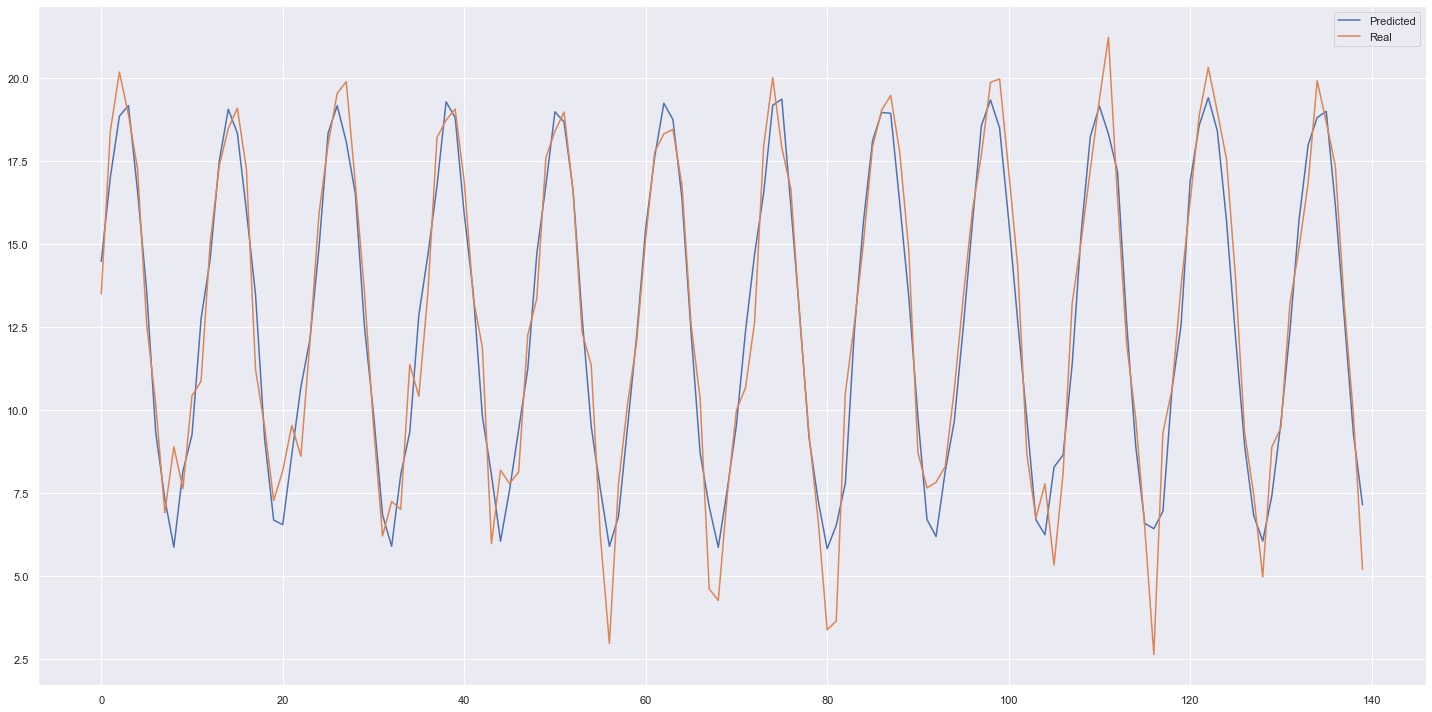

In [196]:
from pickle import load
# load the scaler
scaler = load(open('scaler_fr.pkl', 'rb'))

Y_test_predicted_rescaled = scaler.inverse_transform(Y_test_predicted)

Y_test_rescaled = scaler.inverse_transform(Y_test)

size = len(Y_test) - 800
plt.plot(Y_test_predicted_rescaled[:size], label = 'Predicted')
plt.plot(Y_test_rescaled[:size], label = 'Real')
plt.legend()

## Erreur
### MSE
Il existe énormément de façon de mesurer l'erreur les plus connues et utilisées sont:
   - Mean Absolute error, qui permet de regarder l'erreur absolue c'est à dire peut importe si les valeurs sont positives ou négatives
   - Mean square error, qui met plus en avant les erreurs larges car il est porte les erreurs au carré
   - Root square mean error, c'est la même que la précédente sauf que les erreurs sont d'abords porté à la racine et vont donc être moins fort pour les large erreurs
   
- (1) Faire le calcul de la MSE, RMSE, MAE en utilisant les fonctions de sklearn 
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

- (2) Faire un plot bar de ces erreurs sur le même graphe

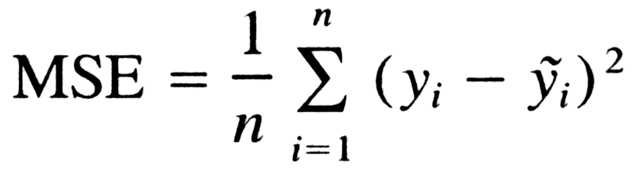

- Prendre chaque valeur connue (y) ==> Y_test
- Soustraire à la valeur prédite (yhat) ==> Y_test_predict
- Passer au carré 
- Faire la somme de tout ça 
- Diviser par le nombre de données ==> N


### RMSE 

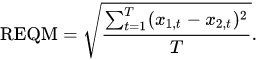


- Même chose que MSE mais à la racine

In [202]:
y = np.array(Y_test)
yhat = np.array(Y_test_predicted)

In [241]:
## Scalé
print("MSE Perso = ", np.average(((y - yhat)**2)))

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("MSE Sklearn = ", mean_squared_error(y, yhat, squared=True))

MSE Perso =  0.08459120564975184
MSE Sklearn =  0.08459120564975184


In [238]:
## Rescalé (valeur température)
np.average(((Y_test_rescaled - Y_test_predicted_rescaled)**2))

1.927352059951067

In [243]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mean_squared_error(y, yhat, squared=True)

0.08459120564975184

 - (1) Faire le calcul de MAE, MSE, RMSE sur data scalé
 - (2) Faire un bar plot

In [215]:
def mse(y_real_values, y_predicted_values):
    return (np.average((y_real_values - y_predicted_values) ** 2))

mse(y, yhat)

0.08459120564975184

In [ ]:
(y - yhat)**2

In [219]:
mean_squared_error(y, yhat, squared = True)

0.08459120564975184

<AxesSubplot:>

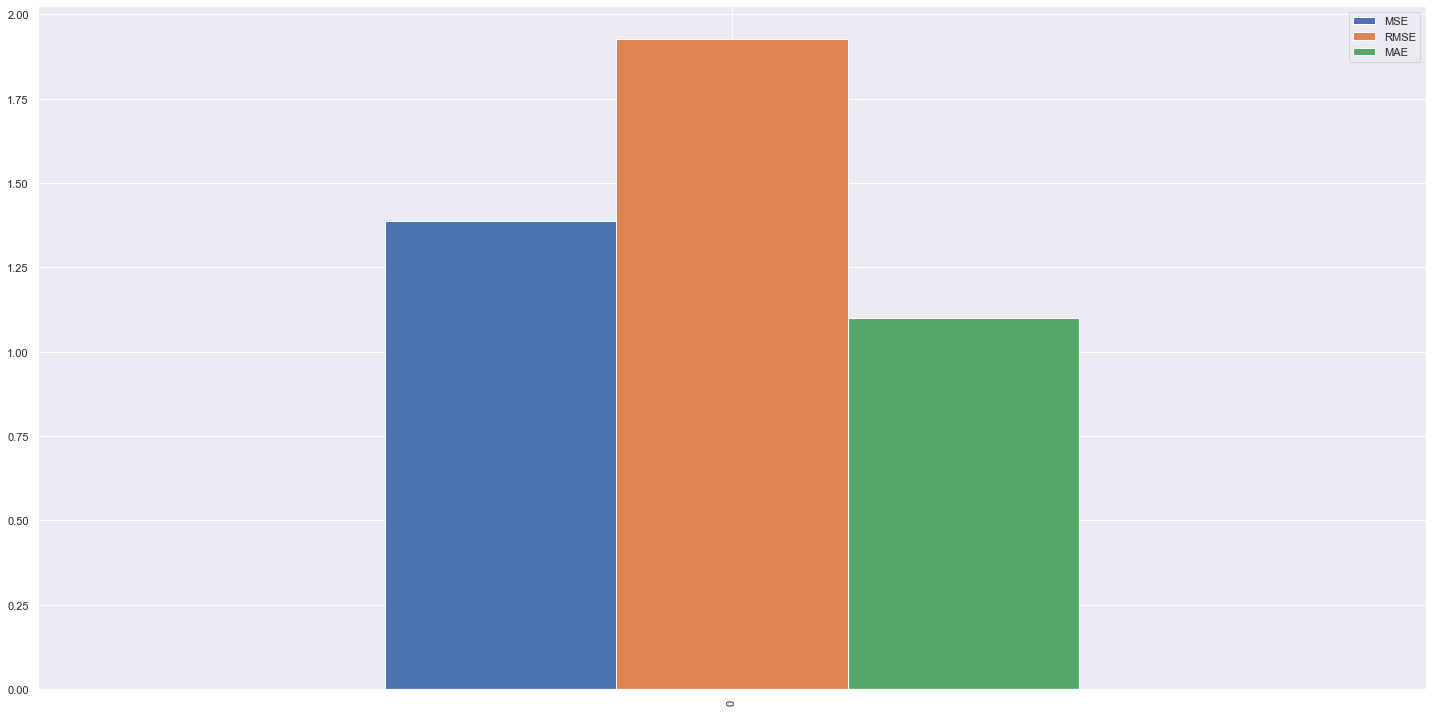

In [209]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def error(df_actual, df_predicted):
    mse = mean_squared_error(df_actual, df_predicted, squared=False)
    rmse  = mean_squared_error(df_actual, df_predicted, squared=True)
    mae =  mean_absolute_error(df_actual, df_predicted)
    return mse, rmse, mae

errorS = pd.DataFrame(error(Y_test_rescaled, Y_test_predicted_rescaled)).T
errorS.columns=['MSE','RMSE','MAE']
errorS.plot.bar()

## Sauver et loader un modèle

In [ ]:
model.save('model_temperature_fr')
model = keras.models.load_model('model_temperature_fr')

## Tester les paramètres
- Vous avez maintenant beaucoup d'élément pour tester et trouver les meilleurs paramètres pour votre erreur. 